# Numpy 이용 Linear Regression 구현

- 참고한 사이트 1: https://teddylee777.github.io/scikit-learn/gradient-descent
- 참고한 사이트 2: https://iyousys.tistory.com/42 (이 사이트가 조금 더 디테일하게 설명나와 있음)

- input : $x_{i} \in \mathbb{R}$
- output : $y_{i} \in \mathbb{R}$
- error function : SSE $\frac{1}{2}\sum_{i=1}^{n}(y_{i} - x_{i})^{2}$ or MSE $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - x_{i})^{2}$ or else (경사손실법으로 학습 가능한 함수는 다 ok)
- learning algorithm : gradient descent

- Linear Regression: y = wx + b

X: [1 2 3 4 5]
Y: [1 3 3 4 5]


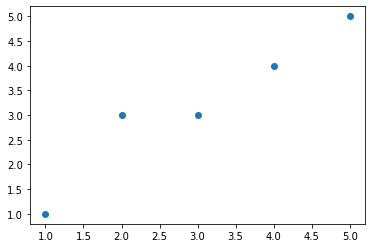

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5]) # X는 Vector 형태
Y = np.array([1,3,3,4,5]) # Y는 Vector 형태

print("X:", X)
print("Y:", Y)

plt.scatter(X, Y)

In [ ]:
# 원본
class LinearModel:
  def __init__(
    self
  ):
    """선형 회귀 모형 초기화. Y=WX+b
    """
    self.W = 1.
    self.b = 0.
    self.lr = 0.001

  def forward(
    self,
    X: np.array,
    Y: np.array
  ) -> (np.array, np.array):
    # 이 부분을 작성하세요.
    # 입력 데이터로부터 y_hat과 error 값을 구하는 부분 입니다.

    raise NotImplementedError


  def backward(      # backward() 함수는 input으로 loss만 들어감
    self,
    loss: np.array
  ):
    # 이 부분을 작성하세요.
    # error 값을 이용해서 W, b 값을 미세 조정하는 부분 입니다.
    
    raise NotImplementedError

In [ ]:
# 구현용

class LinearModel:
  def __init__(
    self
  ):
    """선형 회귀 모형 초기화. Y=WX+b
    """
    self.W = 1.   # 인스턴스 변수로 W, b, lr 선언
    self.b = 0.
    self.lr = 0.001

  def forward(
    self,
    X: np.array,
    Y: np.array
  ) -> (np.array, np.array):
    
    # 입력 데이터로부터 y_hat과 error 값을 구하는 부분
    y_hat = self.W * X + self.b # y_hat.shape == X.shape (y_hat은 Vector 형태)
    error = (y_hat - Y) ** 2  # error.shape == Y.shape (error는 Vector 형태)

    return y_hat, error

    raise NotImplementedError


  def backward(      # backward() 함수는 input으로 loss만 들어감
    self,
    loss: np.array
  ):
    # error 값을 이용해서 W, b 값을 업데이트하는 부분
    
    self.W = self.W - self.lr*((y_hat - Y) * X).mean()  # 의문점: backward() 함수에는 y_hat, Y, X가 Input으로 안 들어가는데 어떻게 동작하는거지,,,? 
    self.b = self.b - self.lr*(y_hat - Y).mean()        


    return self.W, self.b  # backward() 함수가 호출되면 backward() 함수의 결과인 self.W와 self.b가 다시 LinearModel 인스턴스의 W와 b에 저장됨

    raise NotImplementedError

실제값:  [1 3 3 4 5]
예측값:  [1.39777762 2.298629   3.19948039 4.10033177 5.00118315]
Loss:  [1.58227035e-01 4.91921275e-01 3.97924245e-02 1.00664639e-02
 1.39984959e-06]
y=0.90x+0.50


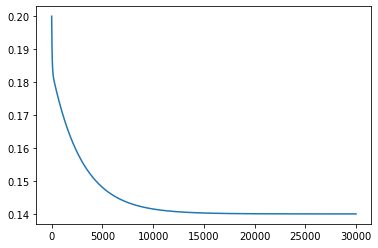

In [ ]:
epochs = 30000
model = LinearModel()
losses = []
for _ in range(epochs):  # 특정 변수명을 사용한 것이 아니라 _을 했네! for문 안에 특정 변수명(ex. i)을 사용하지 않아서 이렇게 해도 되는구나
  y_hat, loss = model.forward(X, Y)  # y_hat 및 Loss 계산 (Feed-forward)
  model.backward(loss)  # Gradient Descent 이용 Backpropagation 수행
  losses.append(np.mean(loss)) # 매 에포크마다 평균 Loss 값 구해서 losses라는 리스트에 저장
print("실제값: ",Y)
print("예측값: ", y_hat)
print("Loss: ",loss)
print("y={0:.2f}x+{1:.2f}".format(model.W, model.b))
plt.plot(range(epochs), losses)